# Dataset Overview

In [ ]:
# prompt: import dataset
!pip install dataset
import dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/updated_pollution_dataset.csv'
data = pd.read_csv(file_path)


#  1. Pre-Processing dan EDA

## Pre-Processing Dataset

### Memeriksa tipe data

In [ ]:
# Step 0: Memeriksa tipe data
print("\nData Types of Each Column:")
data.dtypes


Data Types of Each Column:


Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

### Mengganti nama kolom

In [ ]:
# Step 1: mengganti nama kolom
data.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature                    5000 non-null   float64
 1   humidity                       5000 non-null   float64
 2   pm2.5                          5000 non-null   float64
 3   pm10                           5000 non-null   float64
 4   no2                            5000 non-null   float64
 5   so2                            5000 non-null   float64
 6   co                             5000 non-null   float64
 7   proximity_to_industrial_areas  5000 non-null   float64
 8   population_density             5000 non-null   int64  
 9   air_quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


### Memeriksa nilai NULL

In [ ]:
# Step 2: memeriksa nilai null
null_values = data.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
temperature                      0
humidity                         0
pm2.5                            0
pm10                             0
no2                              0
so2                              0
co                               0
proximity_to_industrial_areas    0
population_density               0
air_quality                      0
dtype: int64


### Mengubah tipe data

In [ ]:
# Step 3: mengubah tipe data
data['air_quality'] = data['air_quality'].astype('category')
data.dtypes

temperature                       float64
humidity                          float64
pm2.5                             float64
pm10                              float64
no2                               float64
so2                               float64
co                                float64
proximity_to_industrial_areas     float64
population_density                  int64
air_quality                      category
dtype: object

### Menampilkan Summary

In [ ]:
# Step 4: menampilkan summary
summary_statistics = data.describe(include='all')
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
        temperature     humidity        pm2.5         pm10          no2  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      30.029020    70.056120    20.142140    30.218360    26.412100   
std        6.720661    15.863577    24.554546    27.349199     8.895356   
min       13.400000    36.000000     0.000000    -0.200000     7.400000   
25%       25.100000    58.300000     4.600000    12.300000    20.100000   
50%       29.000000    69.800000    12.000000    21.700000    25.300000   
75%       34.000000    80.300000    26.100000    38.100000    31.900000   
max       58.600000   128.100000   295.000000   315.800000    64.900000   

                so2           co  proximity_to_industrial_areas  \
count   500

### Menampilkan matriks korelasinya

In [ ]:
#menampilkan matriks korelasinya
numerical_data = data.select_dtypes(include=['number']) # Select only numerical columns
correlation_matrix = numerical_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               temperature  humidity     pm2.5      pm10  \
temperature                       1.000000  0.466456  0.323840  0.425690   
humidity                          0.466456  1.000000  0.273366  0.359156   
pm2.5                             0.323840  0.273366  1.000000  0.973005   
pm10                              0.425690  0.359156  0.973005  1.000000   
no2                               0.591969  0.491977  0.333004  0.439916   
so2                               0.568082  0.459804  0.299582  0.401849   
co                                0.685258  0.567540  0.395179  0.518895   
proximity_to_industrial_areas    -0.589564 -0.479646 -0.315766 -0.425018   
population_density                0.481692  0.411630  0.278957  0.365734   

                                    no2       so2        co  \
temperature                    0.591969  0.568082  0.685258   
humidity                       0.491977  0.459804  0.567540   
pm2.5                        

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [ ]:
le=LabelEncoder()
data['air_quality']=le.fit_transform(data['air_quality'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature                    5000 non-null   float64
 1   humidity                       5000 non-null   float64
 2   pm2.5                          5000 non-null   float64
 3   pm10                           5000 non-null   float64
 4   no2                            5000 non-null   float64
 5   so2                            5000 non-null   float64
 6   co                             5000 non-null   float64
 7   proximity_to_industrial_areas  5000 non-null   float64
 8   population_density             5000 non-null   int64  
 9   air_quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


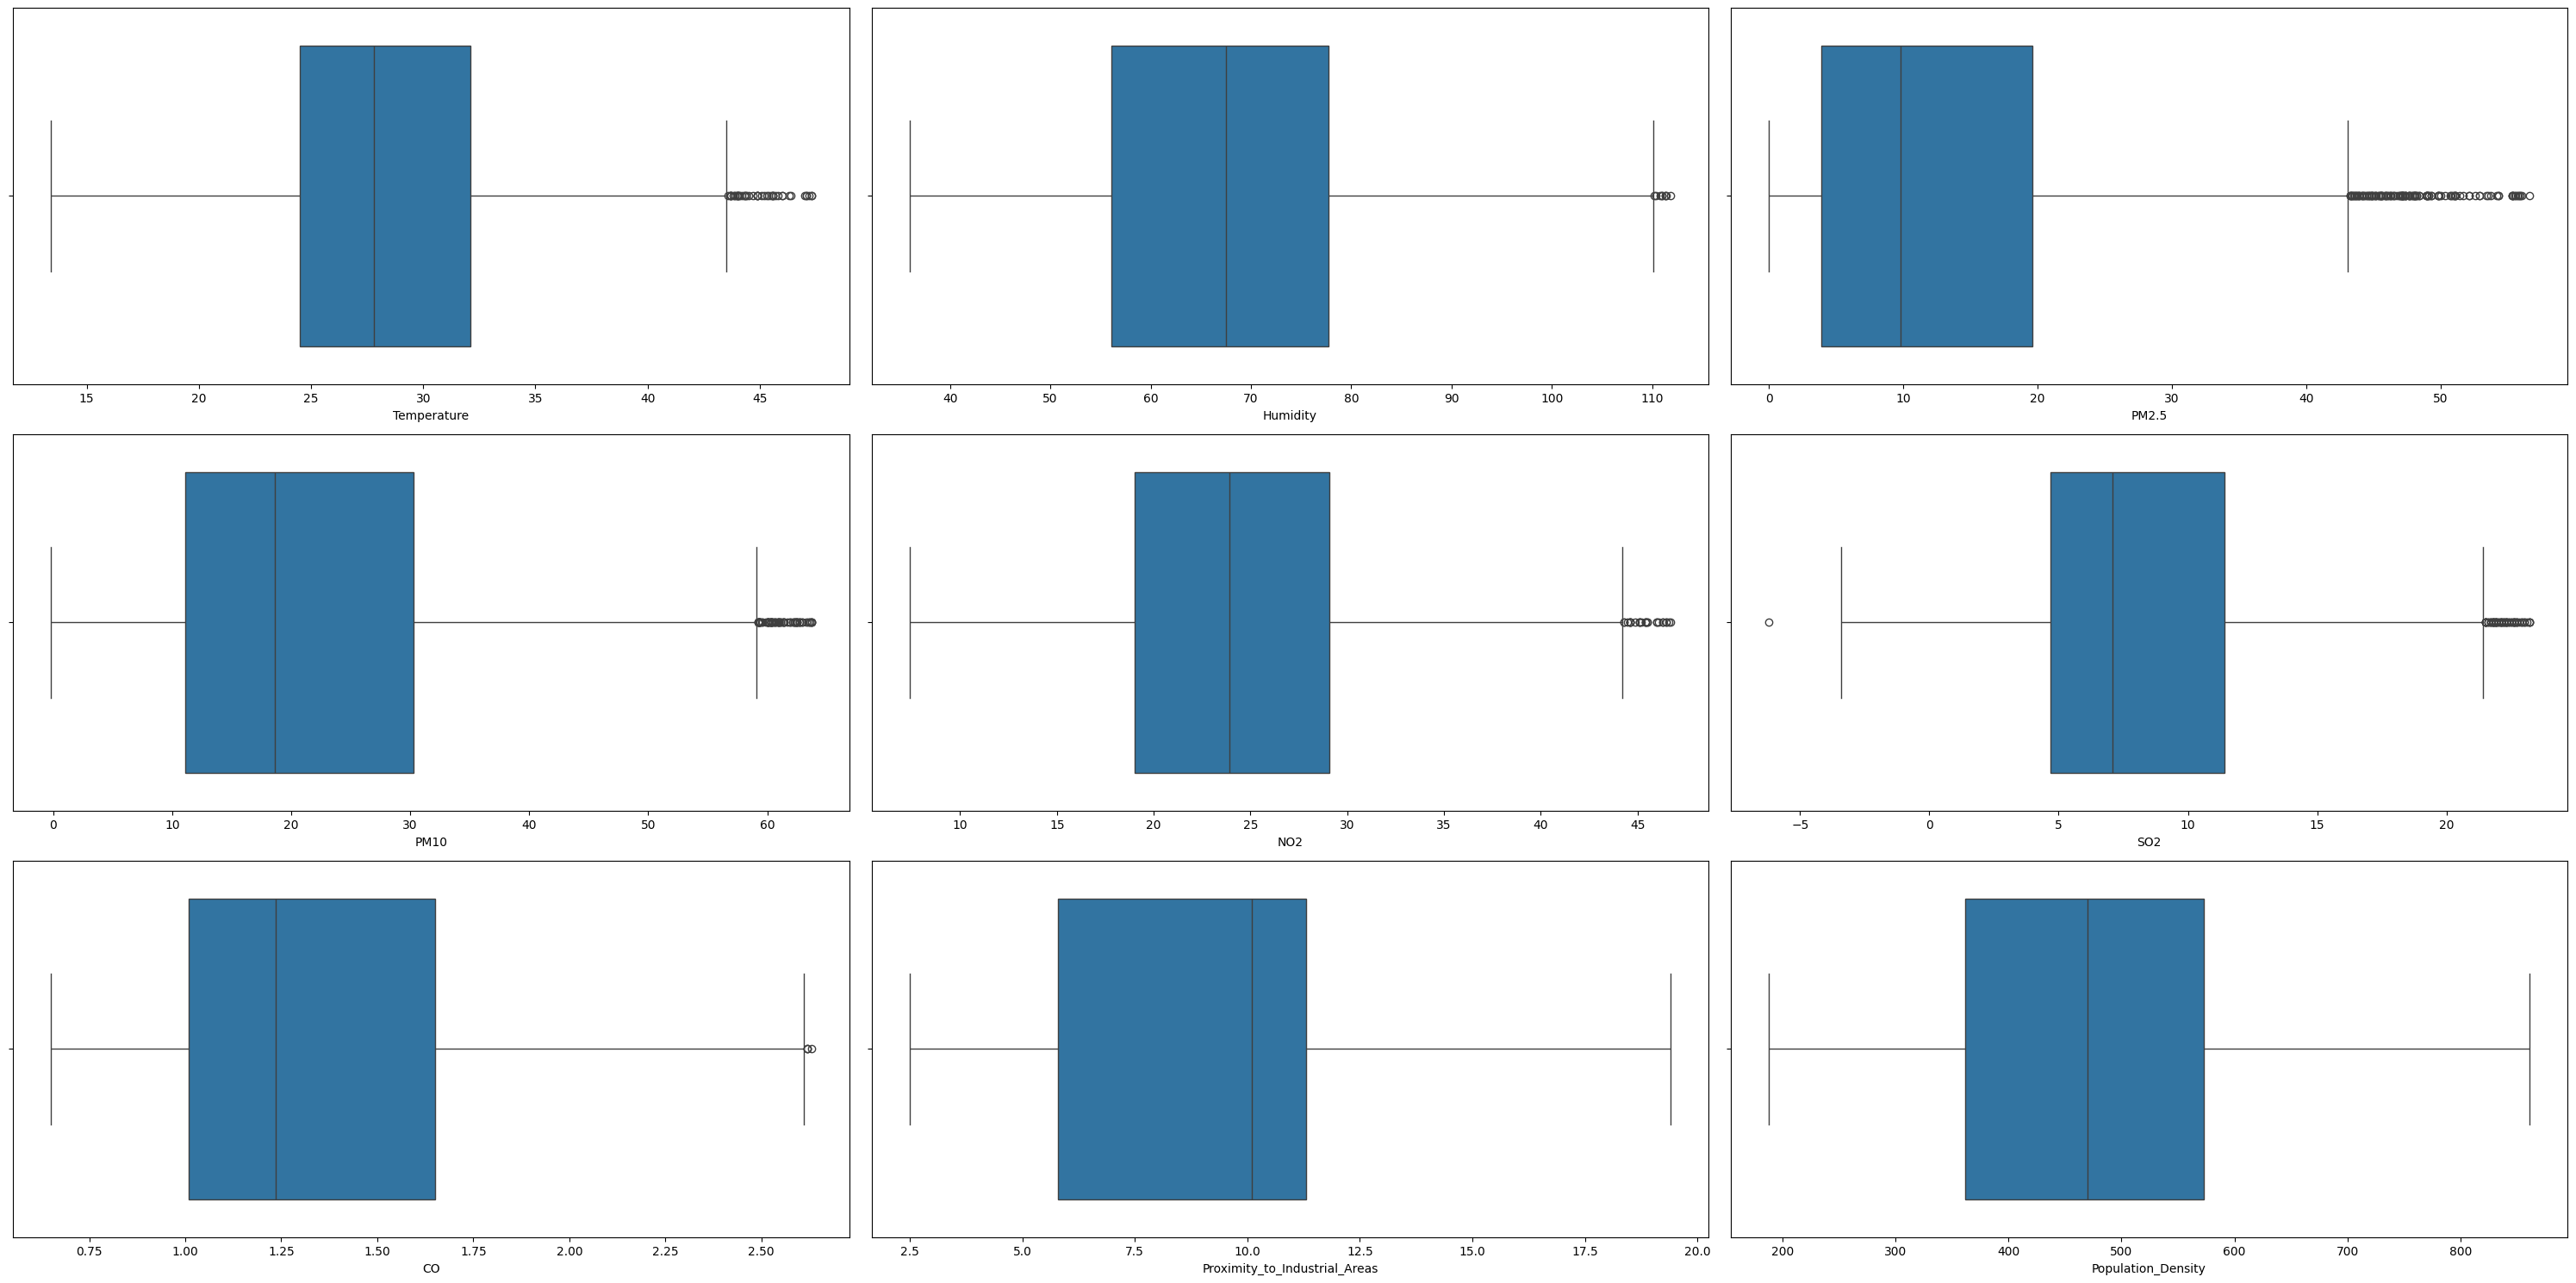

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in data.columns:
    if col!='air_quality' and i<9:
        sns.boxplot(data=data,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [ ]:
for col in data.drop(columns='air_quality').columns:
    q1=np.quantile(data[col],0.25)
    q3=np.quantile(data[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    data=data[(data[col]>=lb)&(data[col]<=ub)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature                    4158 non-null   float64
 1   humidity                       4158 non-null   float64
 2   pm2.5                          4158 non-null   float64
 3   pm10                           4158 non-null   float64
 4   no2                            4158 non-null   float64
 5   so2                            4158 non-null   float64
 6   co                             4158 non-null   float64
 7   proximity_to_industrial_areas  4158 non-null   float64
 8   population_density             4158 non-null   int64  
 9   air_quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


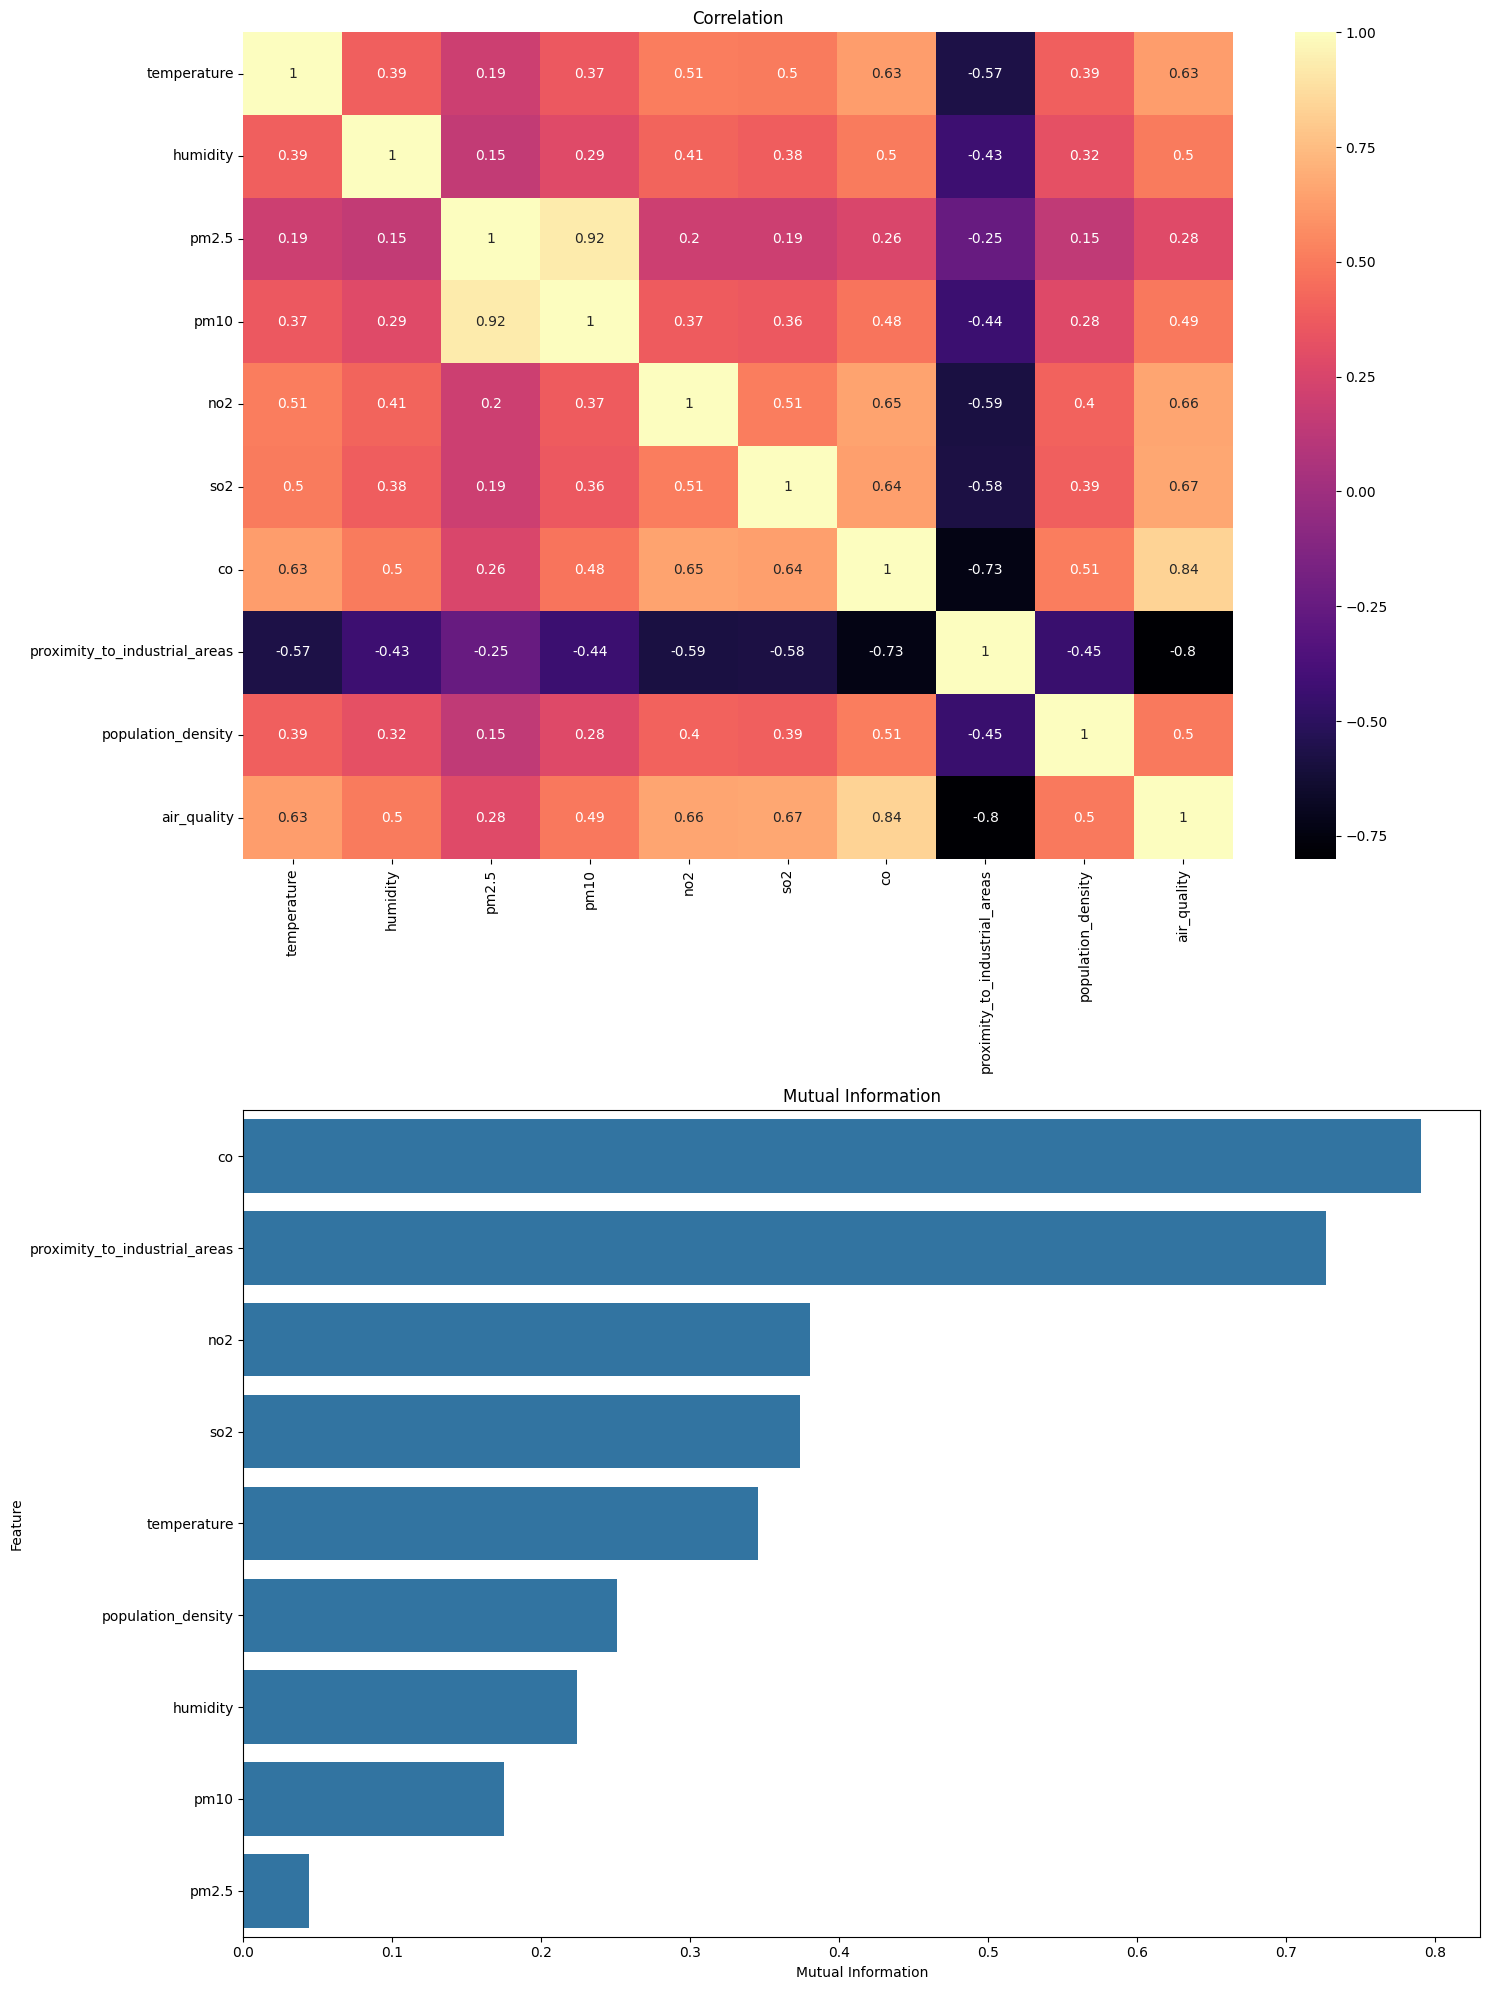

In [ ]:
tdata=data.copy()
x=tdata.drop(columns='air_quality')
y=tdata['air_quality']
mi=mutual_info_classif(x,y)
mi_data=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_data=mi_data.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(data.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_data,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

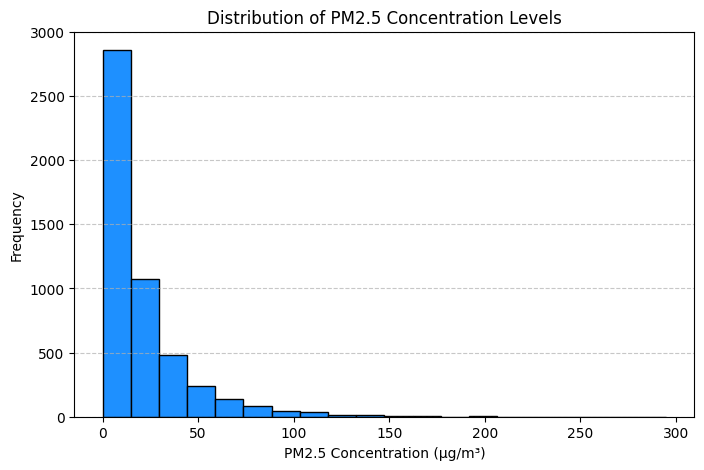

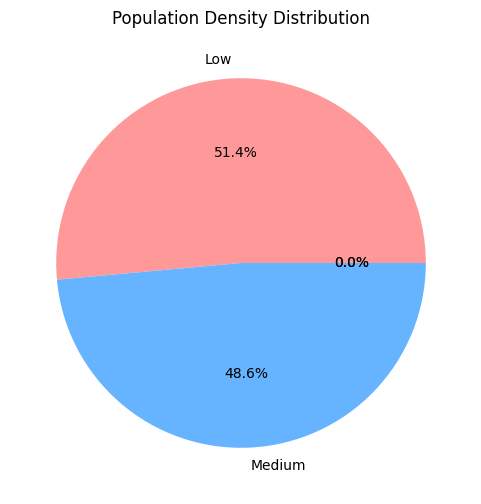

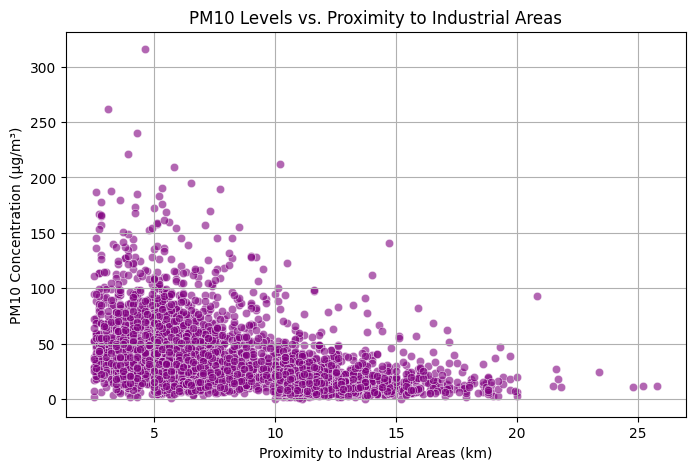

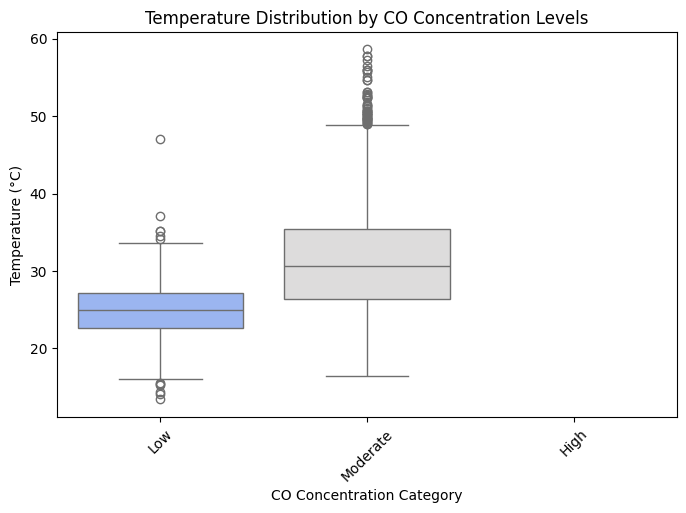

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart: Distribution of PM2.5 Concentration Levels
plt.figure(figsize=(8, 5))
data['pm2.5'].plot(kind='hist', bins=20, color='dodgerblue', edgecolor='black')
plt.title('Distribution of PM2.5 Concentration Levels')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Pie Chart: Population Density Categories
population_density_bins = pd.cut(data['population_density'], bins=[0, 500, 1000, 5000, 10000], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(6, 6))
population_density_bins.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Population Density Distribution')
plt.ylabel('')
plt.show()

# 3. Scatter Plot: PM10 vs. Proximity to Industrial Areas
plt.figure(figsize=(8, 5))
sns.scatterplot(x='proximity_to_industrial_areas', y='pm10', data=data, alpha=0.6, color='purple')
plt.title('PM10 Levels vs. Proximity to Industrial Areas')
plt.xlabel('Proximity to Industrial Areas (km)')
plt.ylabel('PM10 Concentration (µg/m³)')
plt.grid(True)
plt.show()

# 4. Box Plot: Temperature by CO Concentration Levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(data['co'], bins=[0, 1, 5, 10], labels=['Low', 'Moderate', 'High']),
            y='temperature', data=data, palette='coolwarm')
plt.title('Temperature Distribution by CO Concentration Levels')
plt.xlabel('CO Concentration Category')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

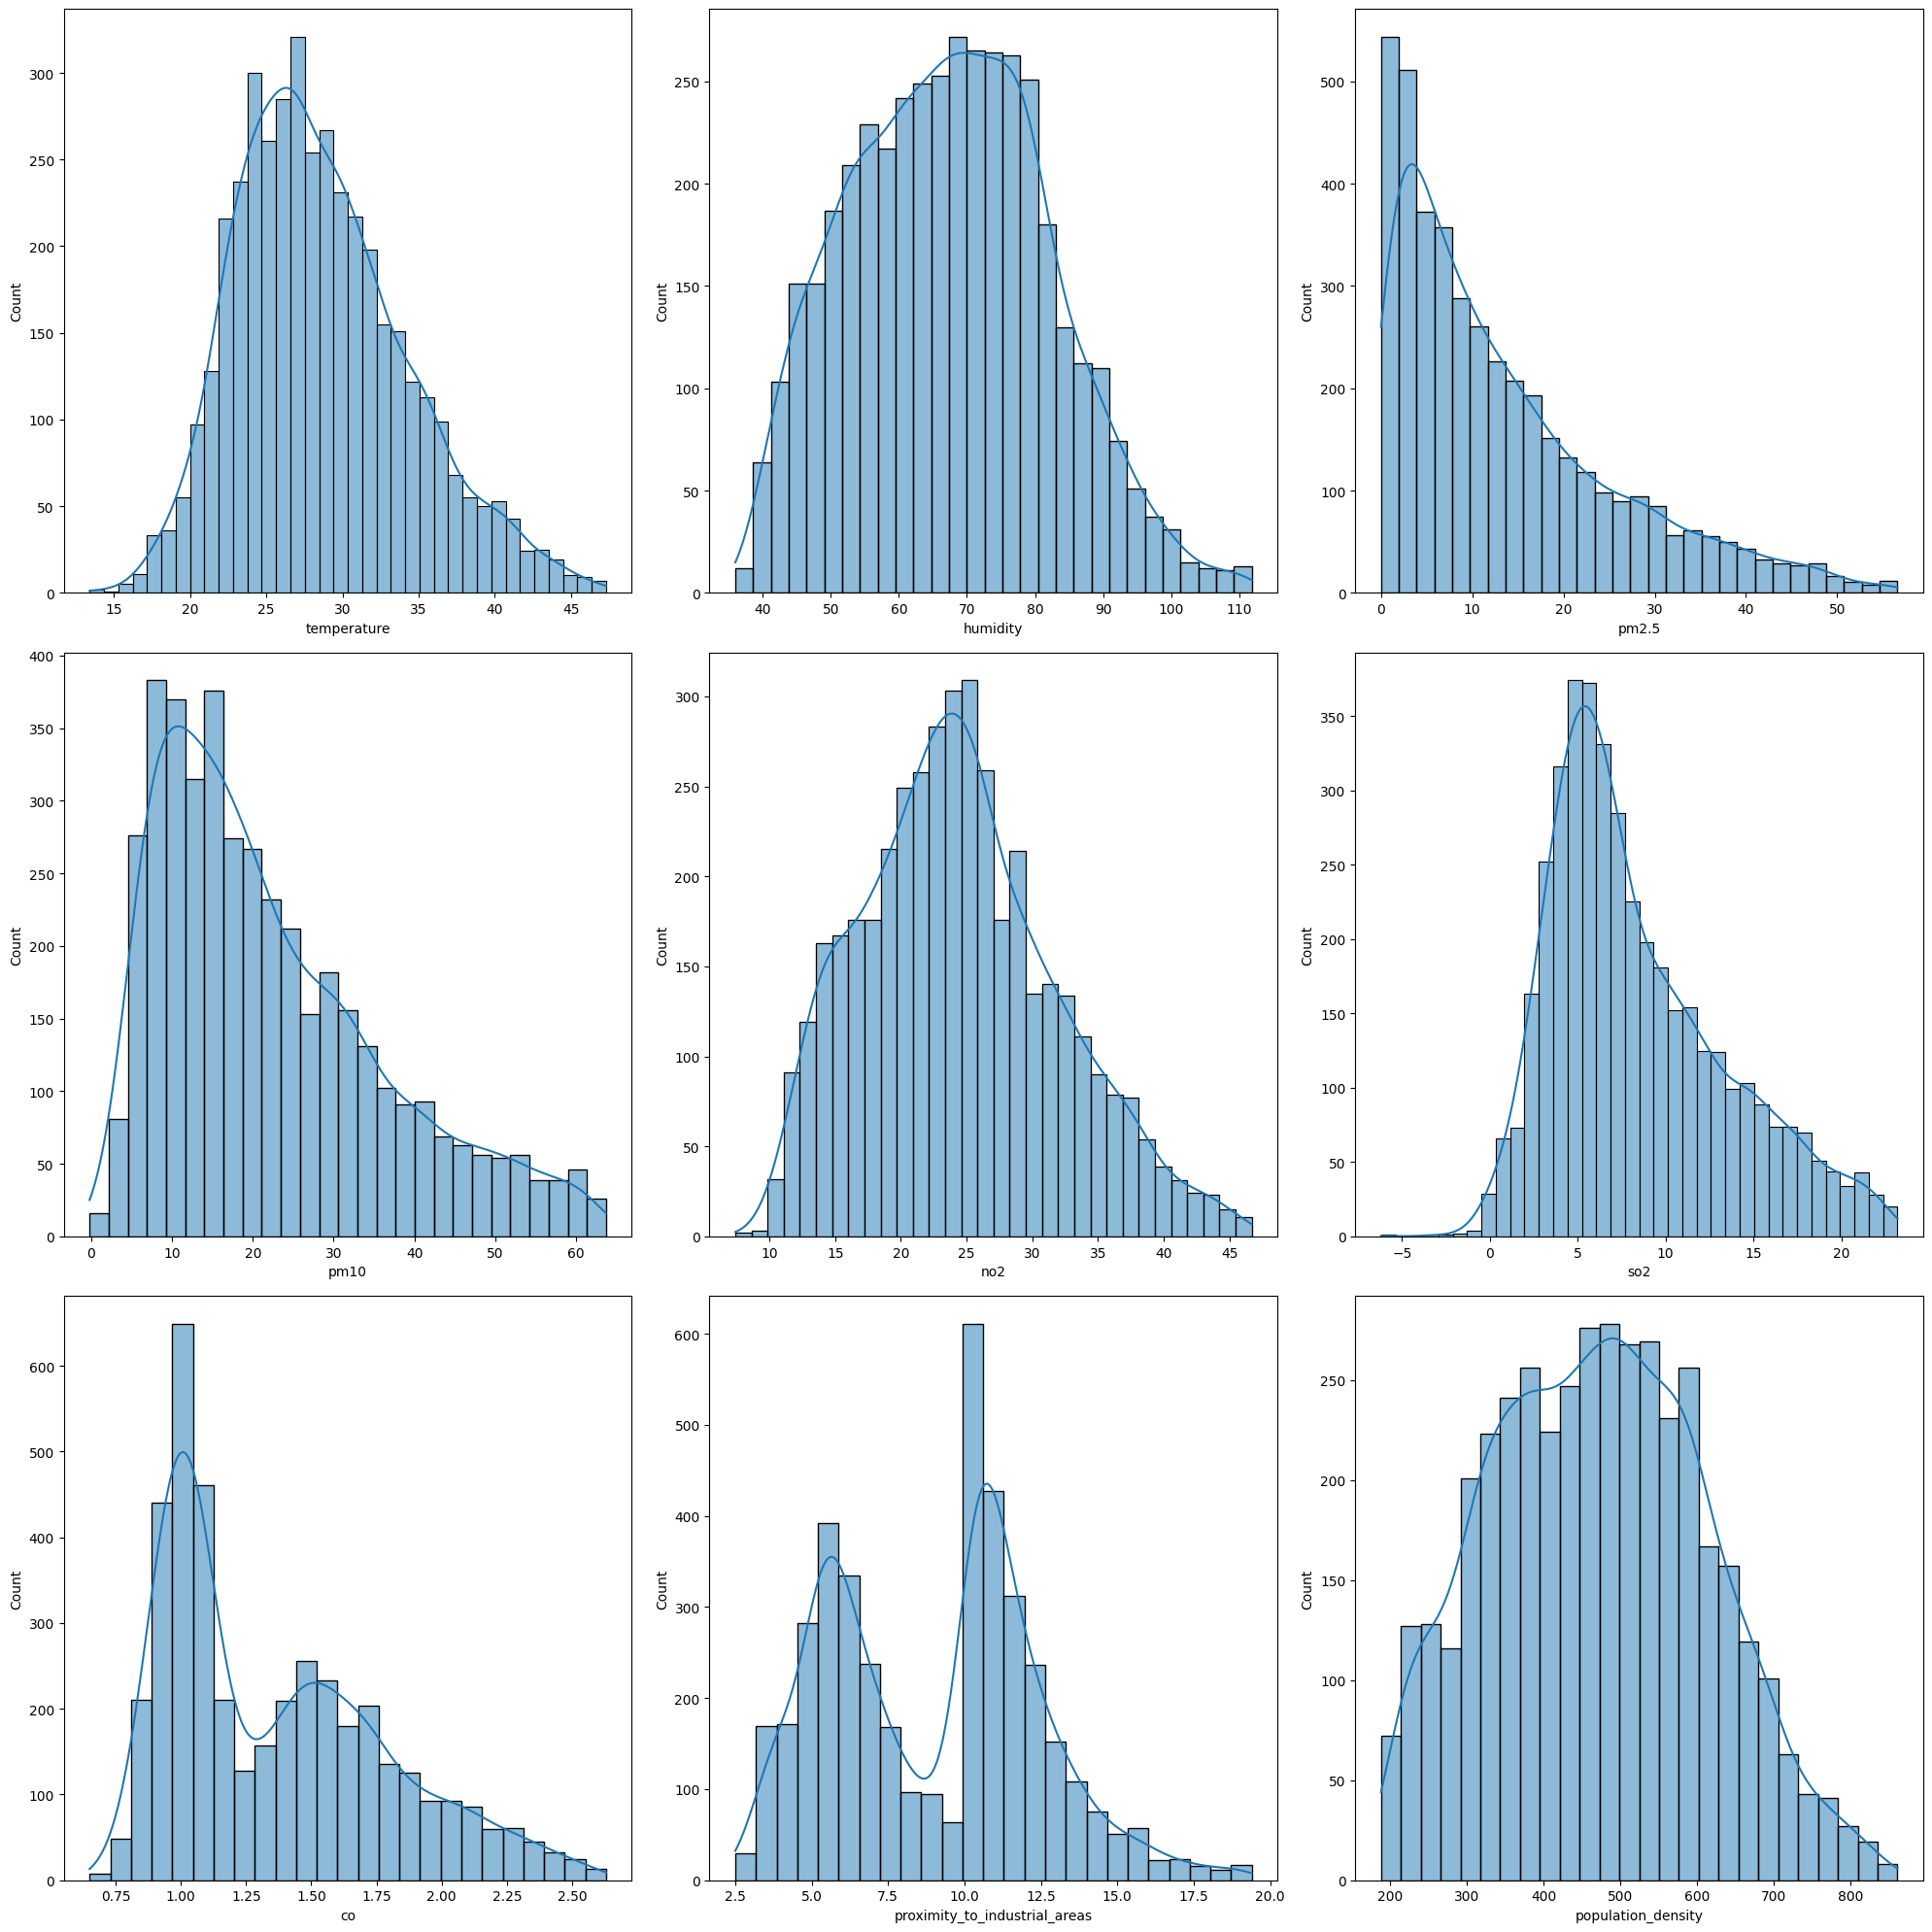

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in data.columns:
    if(col!='air_quality'):
        sns.histplot(data=data,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

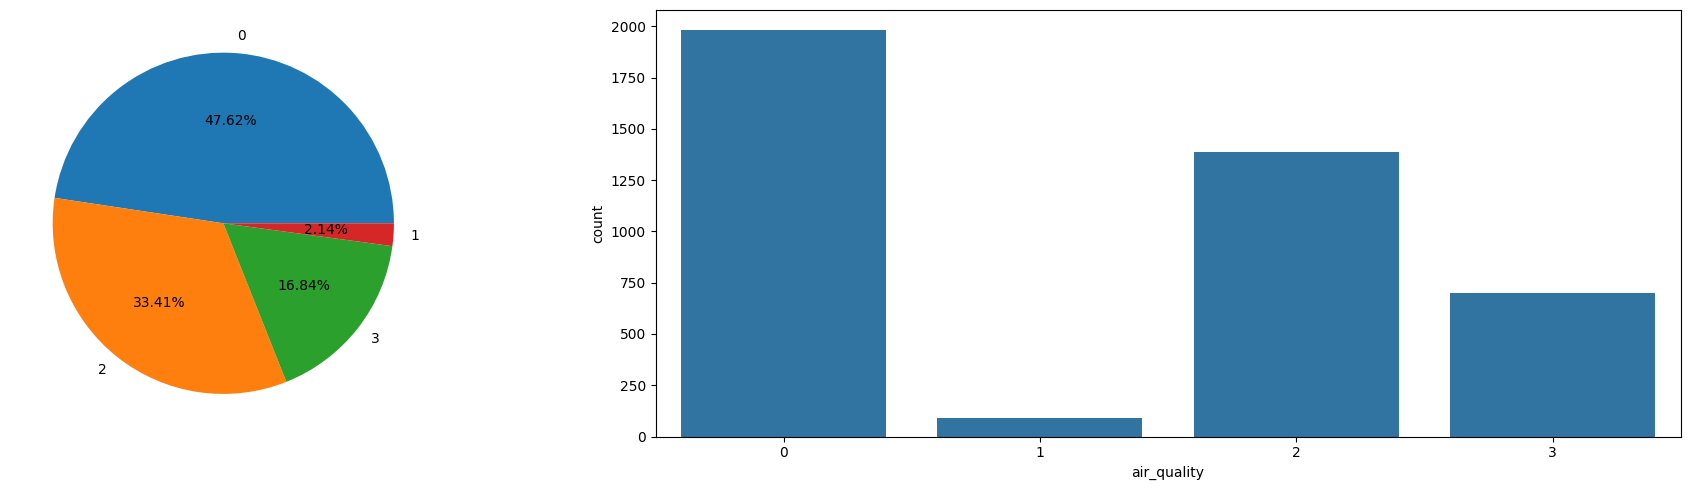

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

tdata=data['air_quality'].value_counts().reset_index()
ax[0].pie(tdata['count'],labels=tdata[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.countplot(data=data,x=col,ax=ax[1])
plt.tight_layout()
plt.show()

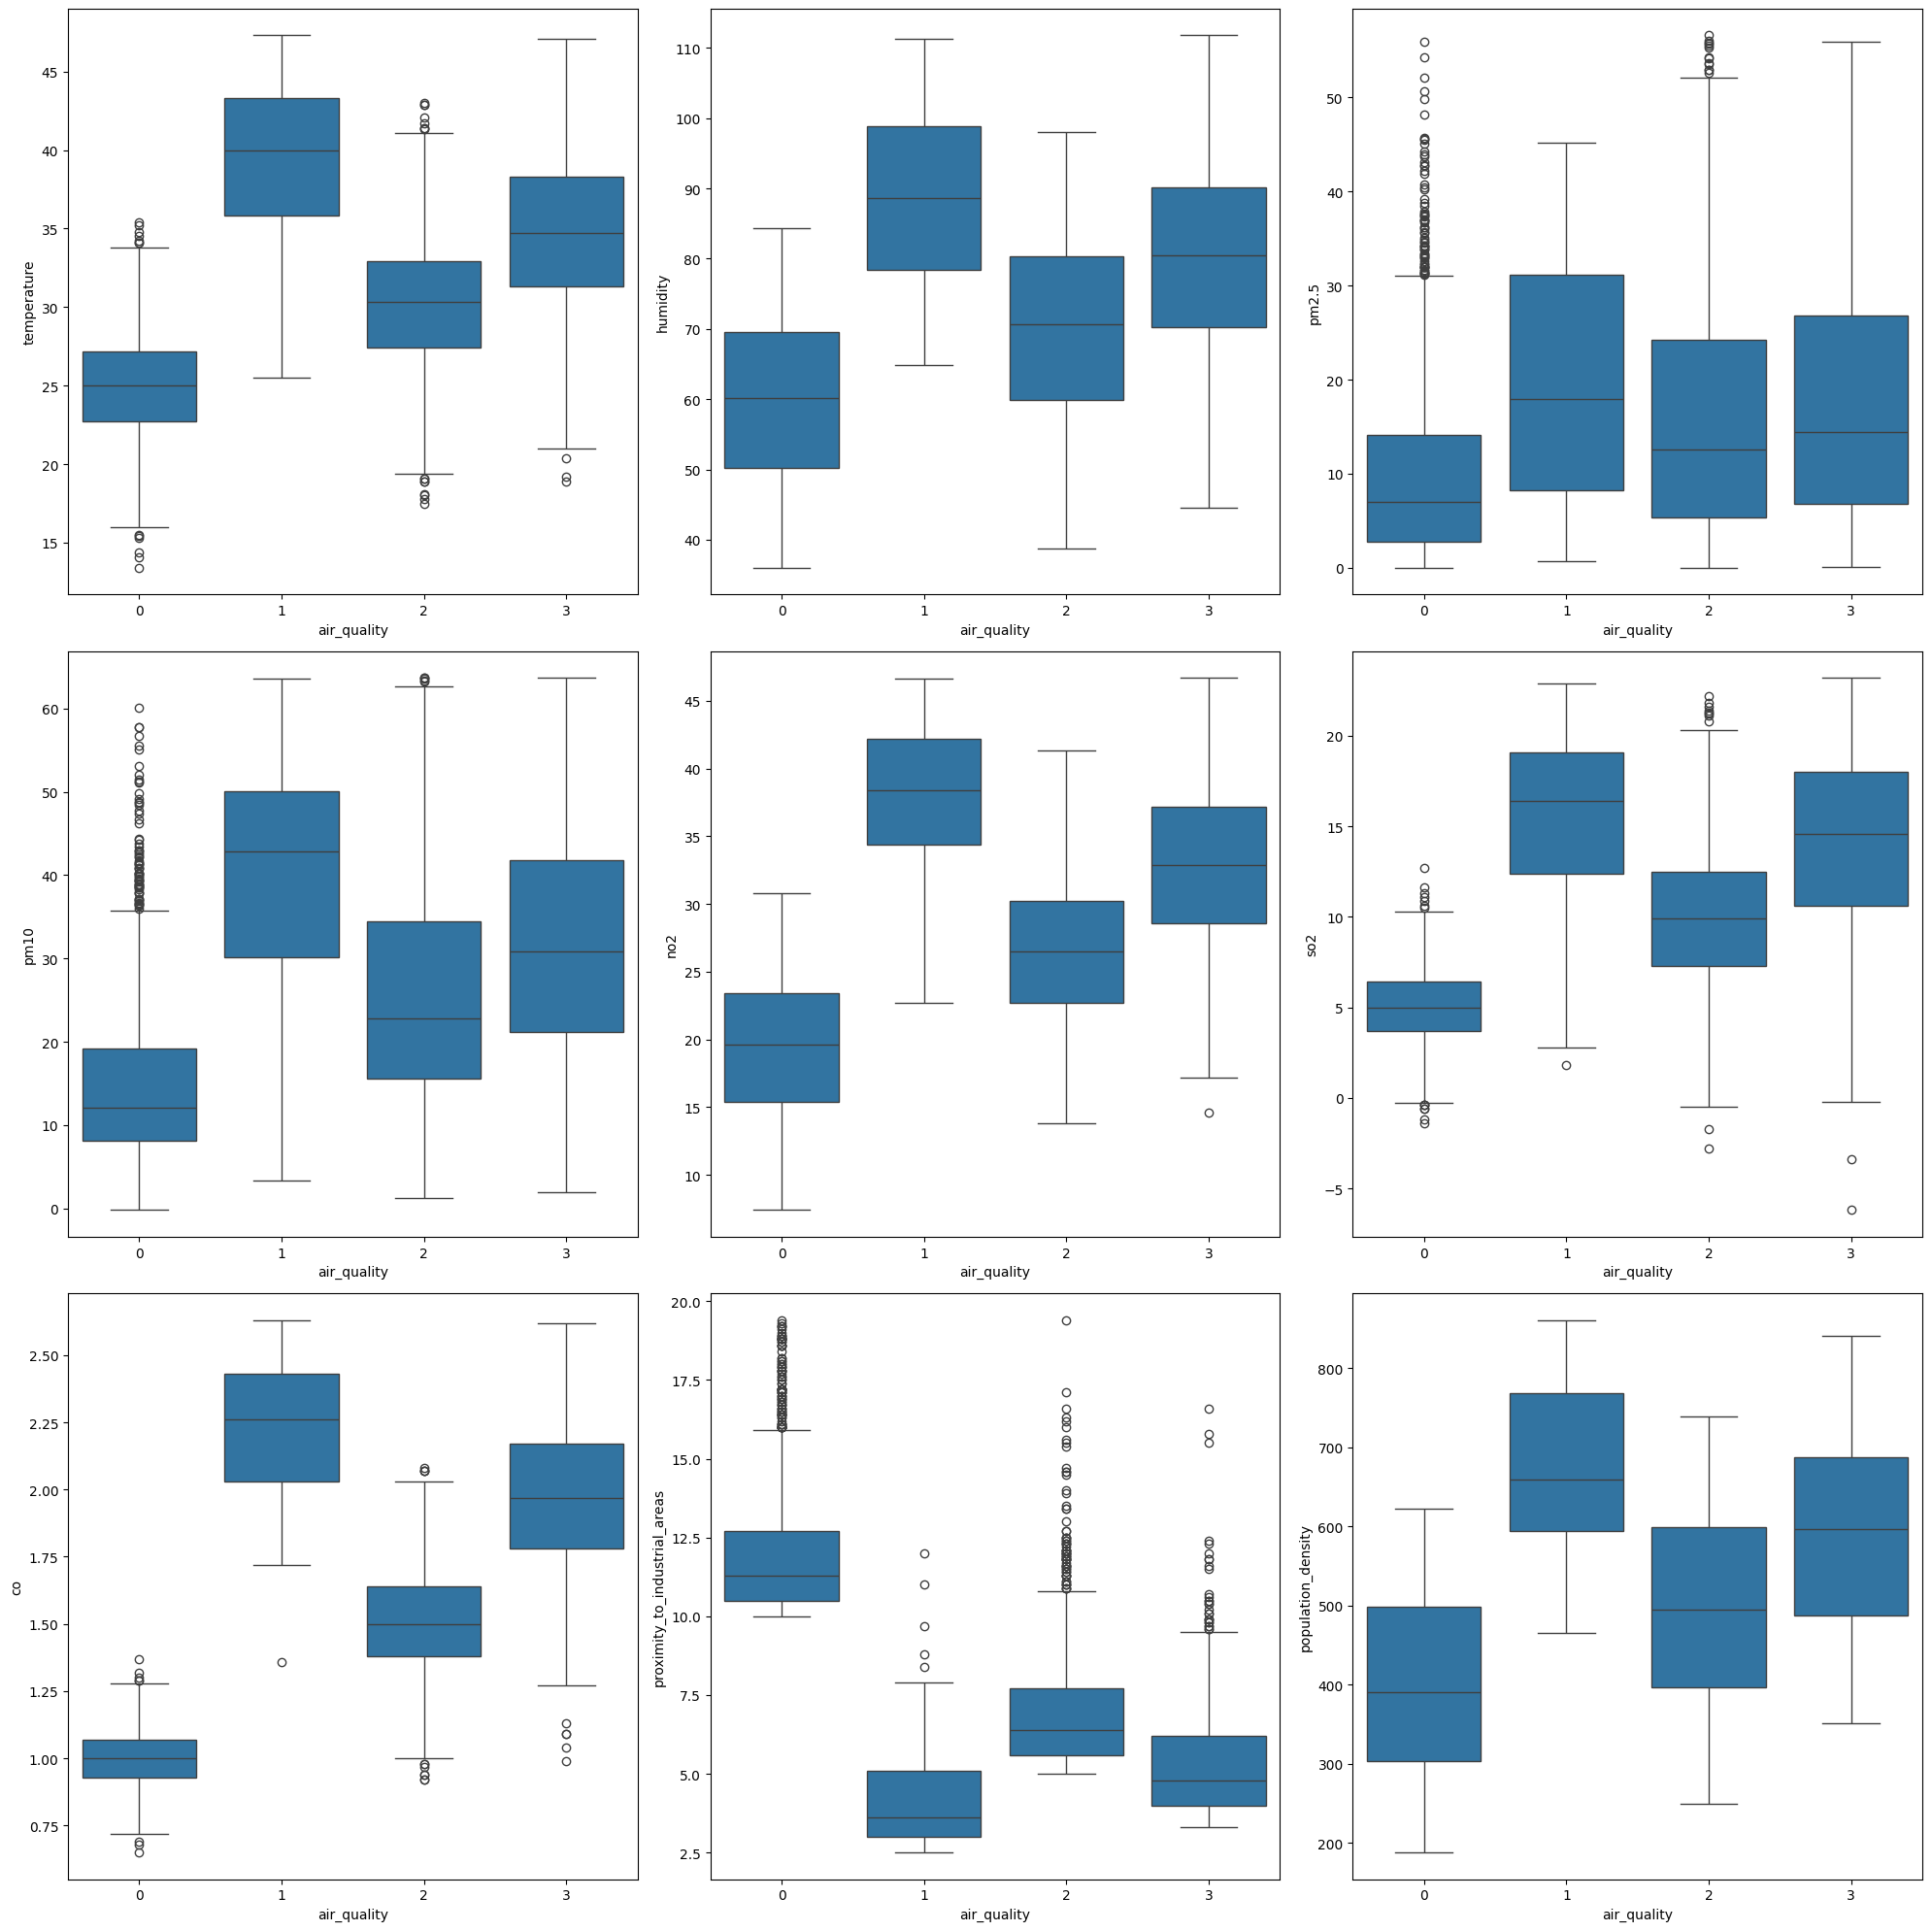

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=data.drop(columns='air_quality')
for col in cols:
    sns.boxplot(data=data, x='air_quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

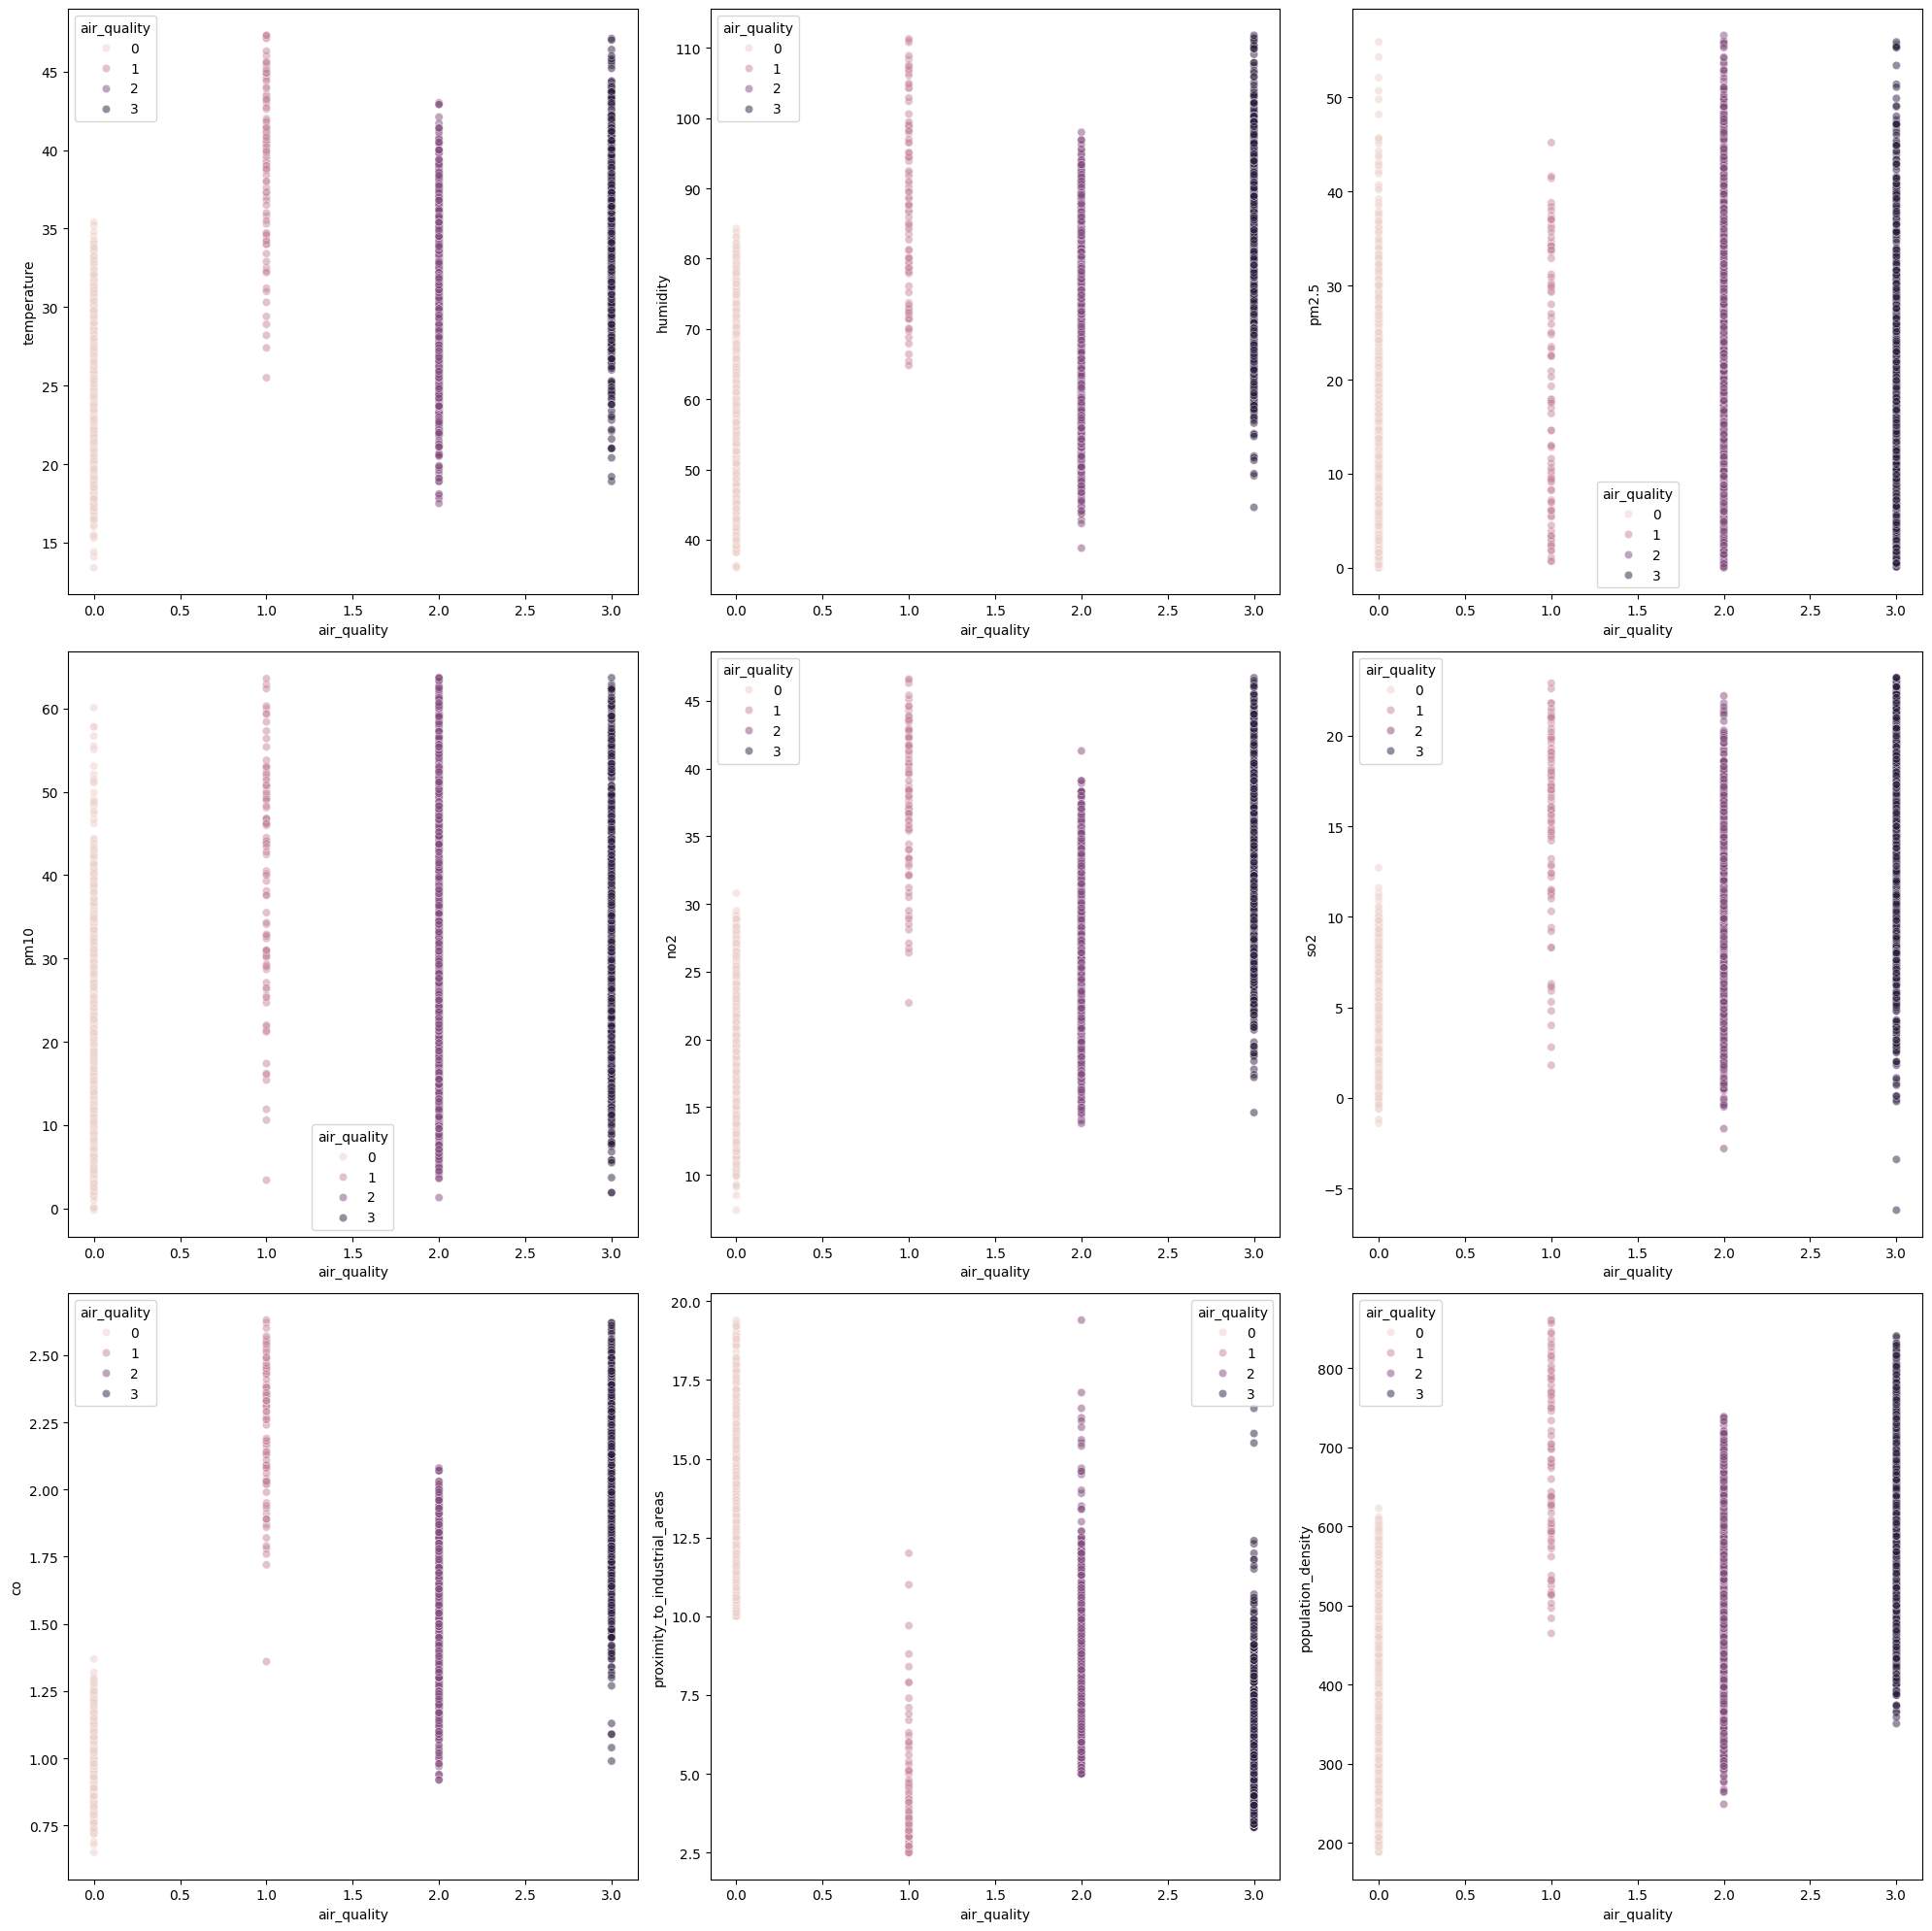

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=data.drop(columns='air_quality')
for col in cols:
    sns.scatterplot(data=data, x='air_quality', y=col, ax=ax[i],hue='air_quality',alpha=0.5)
    i += 1
plt.tight_layout()
plt.show()

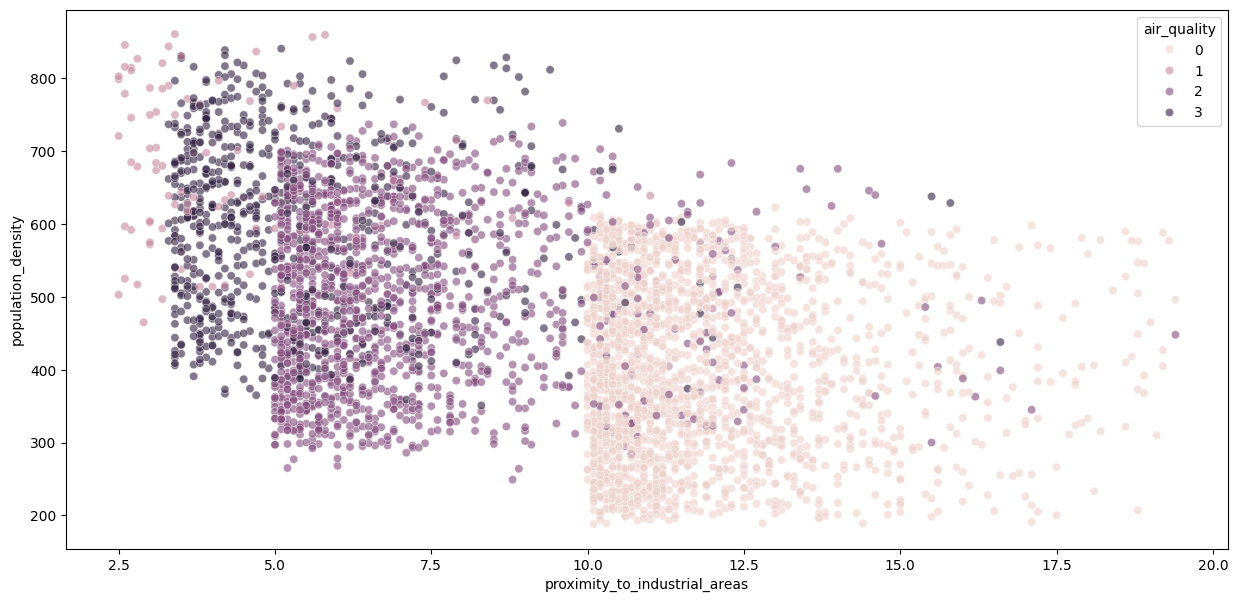

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data,x='proximity_to_industrial_areas',y='population_density',hue='air_quality',alpha=0.6)
plt.show()

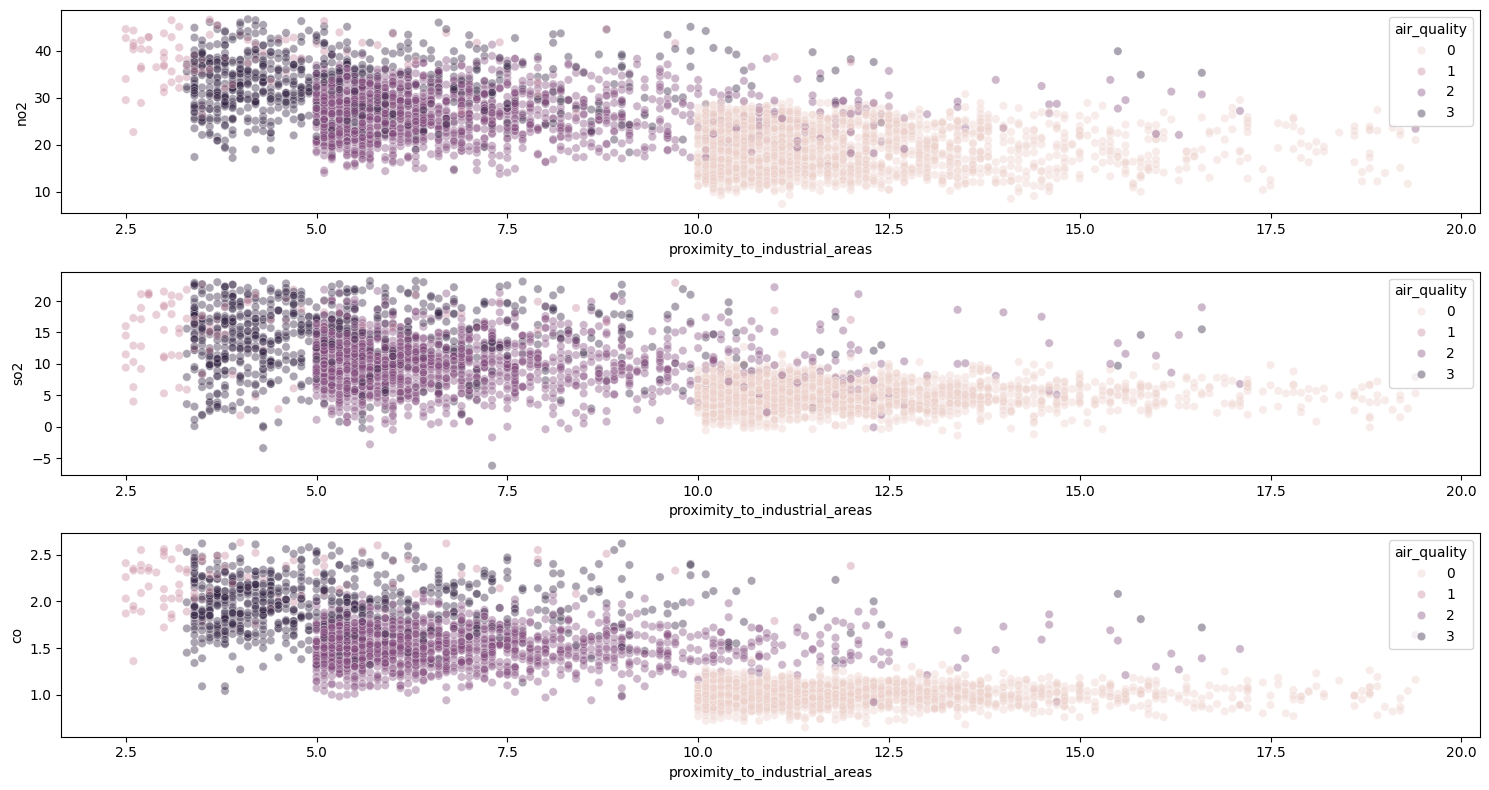

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=data,y='no2',x='proximity_to_industrial_areas',alpha=0.4,ax=ax[0],hue='air_quality')
sns.scatterplot(data=data,y='so2',x='proximity_to_industrial_areas',alpha=0.4,ax=ax[1],hue='air_quality')
sns.scatterplot(data=data,y='co',x='proximity_to_industrial_areas',alpha=0.4,ax=ax[2],hue='air_quality')
plt.tight_layout()
plt.show()

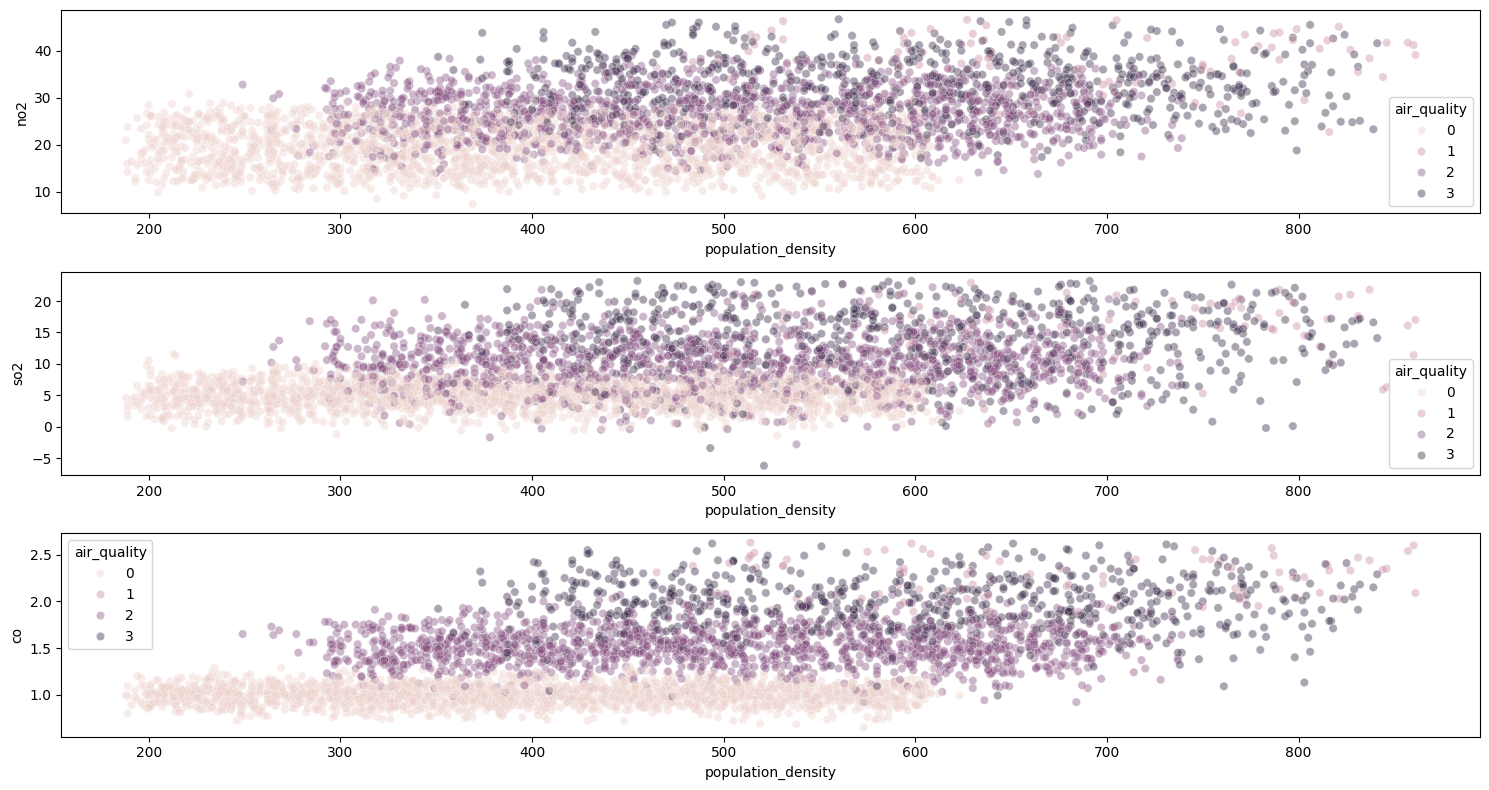

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=data,y='no2',x='population_density',alpha=0.4,ax=ax[0],hue='air_quality')
sns.scatterplot(data=data,y='so2',x='population_density',alpha=0.4,ax=ax[1],hue='air_quality')
sns.scatterplot(data=data,y='co',x='population_density',alpha=0.4,ax=ax[2],hue='air_quality')
plt.tight_layout()
plt.show()

# 2. Modeling

## a. Model Machine Learning
- Random Forest Classifier
- Gradient Boosting Classifier
- Ada Boost Classifier
- Decision Tree Classifier

In [ ]:
# importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
x=data.drop("air_quality",axis=1)
y=data["air_quality"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Random Forest Classifier
96.51442307692307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       0.92      0.55      0.69        20
           2       0.96      0.98      0.97       286
           3       0.89      0.90      0.90       135

    accuracy                           0.97       832
   macro avg       0.94      0.86      0.89       832
weighted avg       0.96      0.97      0.96       832

------------------------------------------------------------
Gradient Boosting Classifier
96.03365384615384
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       391
           1       0.89      0.40      0.55        20
           2       0.95      0.99      0.97       286
           3       0.89      0.87      0.88       135

    accuracy                           0.96       832
   macro avg       0.93      0.82      0.85       832
weighted avg       0.96      0.96 

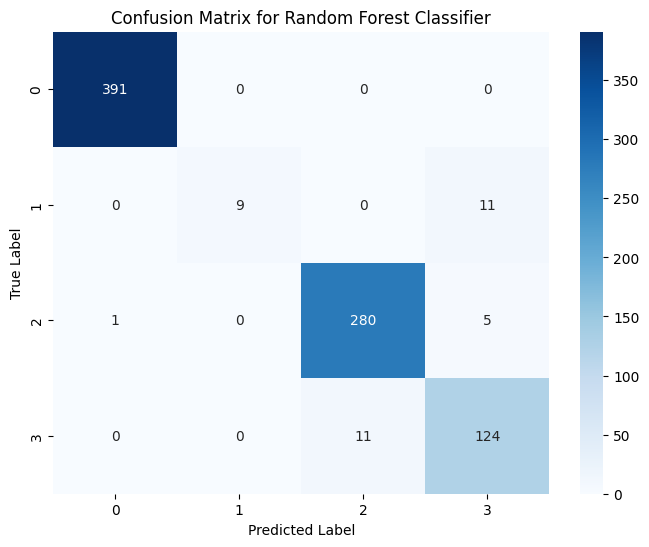

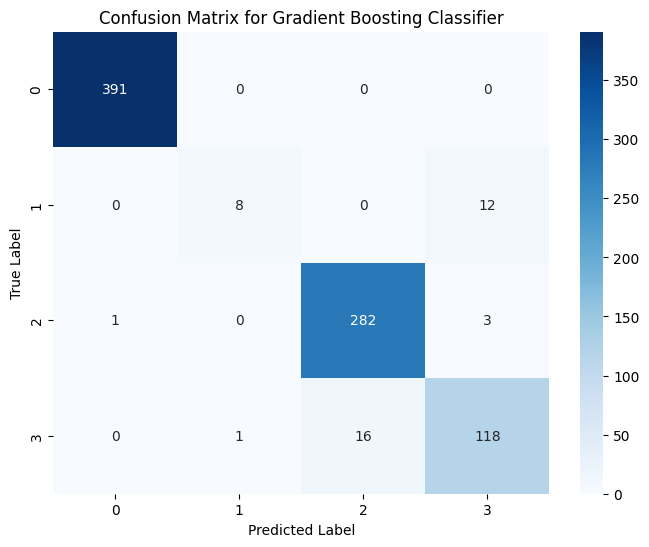

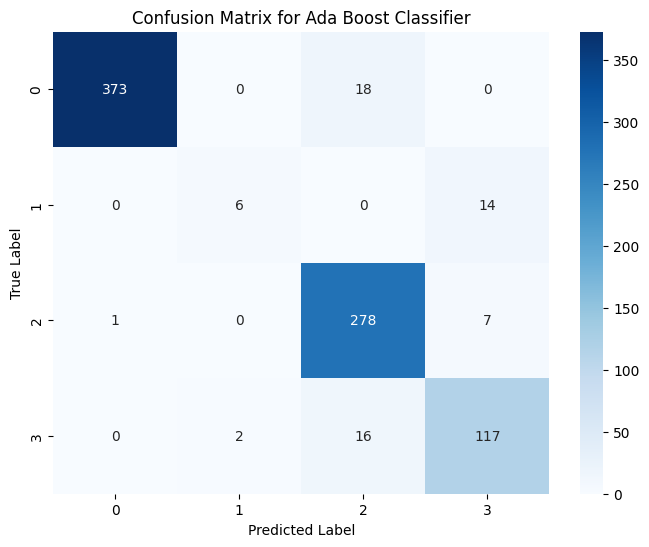

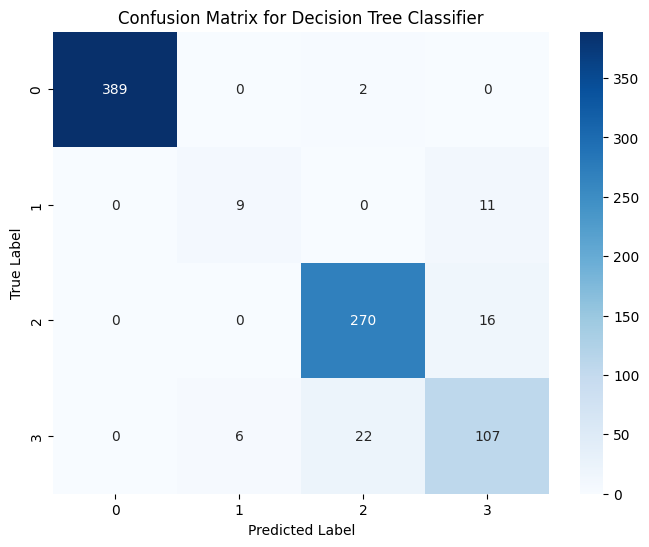

In [ ]:
accuracy_results={}
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_results[name]=accuracy
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

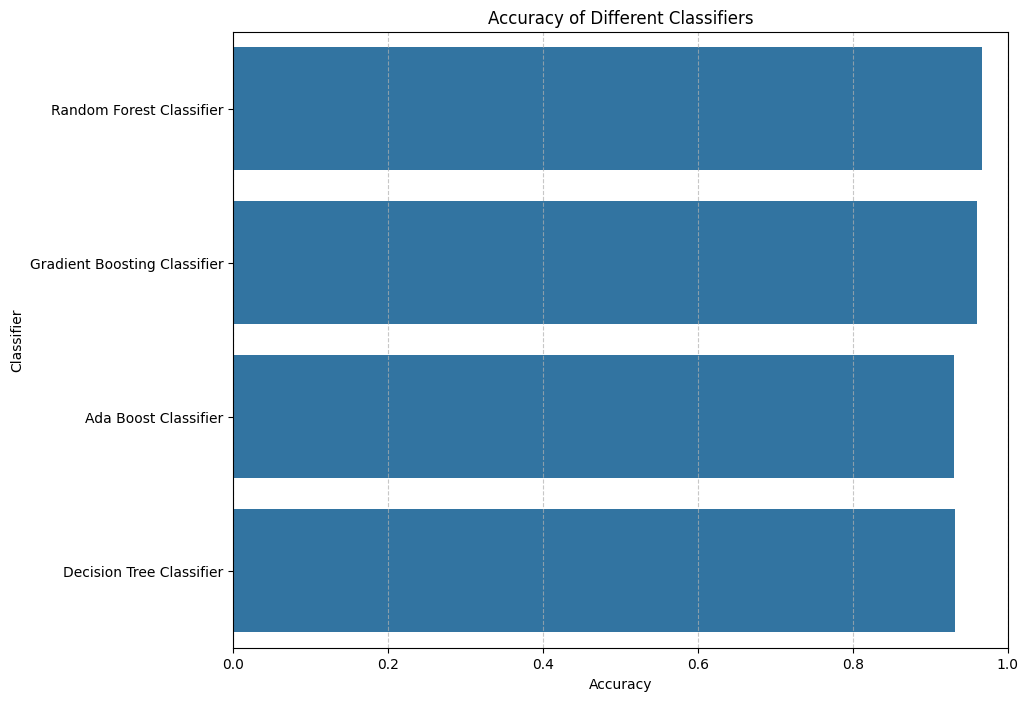

In [ ]:
accuracy_df=pd.DataFrame(accuracy_results.items(),columns=["Classifier","Accuracy"])
plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Classifier", data=accuracy_df)
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## b. Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

rf_random_search.fit(x_train, y_train)
print("Best hyperparameters for Random Forest:", rf_random_search.best_params_)
best_rf_model = rf_random_search.best_estimator_
rf_tuned_pred = best_rf_model.predict(x_test)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)
print(f"Tuned Random Forest Accuracy: {rf_tuned_accuracy}")

# Hyperparameter Tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gb_param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

gb_random_search.fit(x_train, y_train)
print("Best hyperparameters for Gradient Boosting:", gb_random_search.best_params_)

best_gb_model = gb_random_search.best_estimator_
gb_tuned_pred = best_gb_model.predict(x_test)
gb_tuned_accuracy = accuracy_score(y_test, gb_tuned_pred)
print(f"Tuned Gradient Boosting Accuracy: {gb_tuned_accuracy}")

# Compare and Determine Best Model
print(f"Random Forest Tuned Accuracy: {rf_tuned_accuracy}")
print(f"Gradient Boosting Tuned Accuracy: {gb_tuned_accuracy}")

if rf_tuned_accuracy > gb_tuned_accuracy:
    best_model = best_rf_model
    print("Random Forest is the best model.")
else:
    best_model = best_gb_model
    print("Gradient Boosting is the best model.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Tuned Random Forest Accuracy: 0.9615384615384616
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Tuned Gradient Boosting Accuracy: 0.9543269230769231
Random Forest Tuned Accuracy: 0.9615384615384616
Gradient Boosting Tuned Accuracy: 0.9543269230769231
Random Forest is the best model.


## c. Karakteristik model terbaik


Feature Importance (Random Forest):
                         Feature  Importance
7  proximity_to_industrial_areas    0.358404
6                             co    0.353176
5                            so2    0.081684
0                    temperature    0.067941
4                            no2    0.060828
1                       humidity    0.029371
8             population_density    0.026142
3                           pm10    0.015017
2                          pm2.5    0.007436


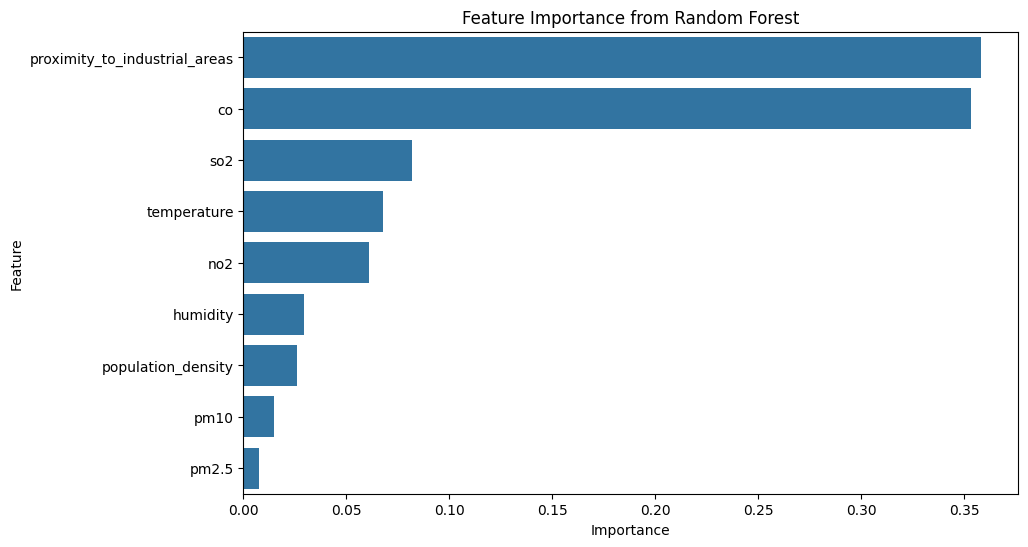


Correlation with Target Variable:
temperature                      0.631865
humidity                         0.502624
pm2.5                            0.283950
pm10                             0.492124
no2                              0.660139
so2                              0.665160
co                               0.836493
proximity_to_industrial_areas   -0.800401
population_density               0.500493
Name: air_quality, dtype: float64


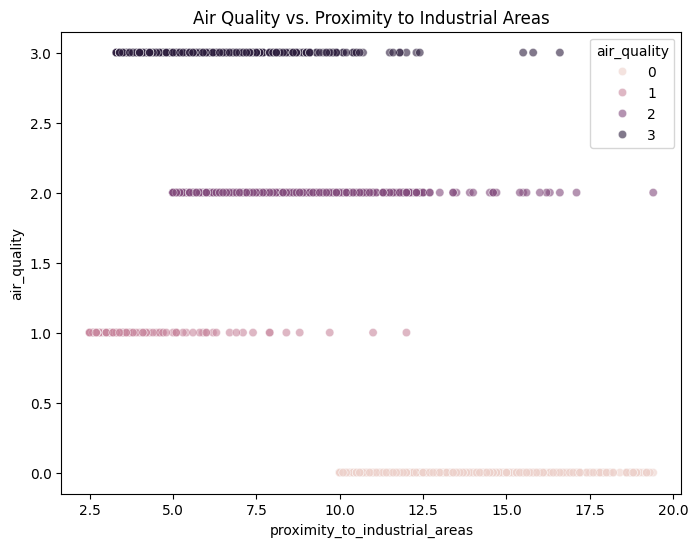

In [ ]:
import numpy as np

# Dengan asumsi 'best_model' dan data relevan didefinisikan dari kode sebelumnya

# Pentingnya Fitur dari model terbaik
if isinstance(best_model, RandomForestClassifier):
    importances = best_model.feature_importances_
    feature_names = x.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance (Random Forest):")
    print(feature_importance_df)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance from Random Forest')
    plt.show()

elif isinstance(best_model, GradientBoostingClassifier):
    importances = best_model.feature_importances_
    feature_names = x.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance (Gradient Boosting):")
    print(feature_importance_df)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance from Gradient Boosting')
    plt.show()

# Correlation Analysis with Target Variable
correlation_with_target = data.corr()['air_quality'].drop('air_quality')
print("\nCorrelation with Target Variable:")
print(correlation_with_target)

# Analyze relationships between important features and the target
# (Example for 'proximity_to_industrial_areas')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='proximity_to_industrial_areas', y='air_quality', data=data, hue='air_quality', alpha=0.6)
plt.title('Air Quality vs. Proximity to Industrial Areas')
plt.show()


Analisis lebih lanjut berdasarkan model yang dipilih:<br>
1. Analisis skor kepentingan fitur. Fitur dengan skor kepentingan yang lebih tinggi berkontribusi lebih banyak pada prediksi model.
2. Bandingkan kepentingan fitur dengan korelasi. Apakah fitur yang sangat penting juga sangat berkorelasi dengan target?
3. Selidiki hubungan antara fitur dan target menggunakan visualisasi dan uji statistik. Apakah hubungan ini sesuai dengan harapan Anda?
4. Pertimbangkan interaksi antara fitur. Apakah efek dari satu fitur bergantung pada nilai fitur lainnya?
5. Jelajahi analisis residual jika berlaku untuk model yang Anda pilih untuk memahami pola dalam kesalahan.

Contoh interpretasi:
- Jika 'proximity_to_industrial_areas' memiliki kepentingan tinggi tetapi korelasi rendah, ini menunjukkan hubungan yang lebih kompleks.
- Visualisasi membantu memahami hubungan; mungkin ada efek non-linier atau ambang batas.